# Coding a GAN


In [10]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

# Download MNIST
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# Code for visualization
def visualize_row(images, img_width=28, cmap='gray'):
    """
    Takes in a tensor of images of given width, and displays them in a column
    in a plot, using `cmap` to map from numbers to colors.
    """
    im = np.reshape(images, [-1, img_width])
    plt.figure()
    plt.axis('off')
    plt.imshow(im, cmap=cmap)
    plt.show()


def variables_from_scope(scope_name):
    """
    Returns a list of all variables in a given scope. This is useful when
    you'd like to back-propagate only to weights in one part of the network
    (in our case, the generator or the discriminator).
    """
    return tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope=scope_name)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


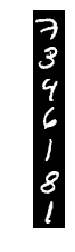

In [5]:
visualize_row(mnist.train.images[:7])

In [25]:
z_dimension = 32 # number of random numbers we're giving to the generator

tf.reset_default_graph()

# placeholders
z = tf.placeholder(tf.float32,[None, z_dimension])
real_X = tf.placeholder(tf.float32, [None,784])

# here, G and D have the same number of layers and same # in intermediate layer, but this is not necessary
# G's variables
W_G1 = tf.Variable(tf.truncated_normal([z_dimension, 256], stddev=0.1))
b_G1 = tf.Variable(tf.zeros([256]))
W_G2 = tf.Variable(tf.truncated_normal([256,784], stddev=0.1))
b_G2 = tf.Variable(tf.zeros([784]))

# D's variables
W_D1 = tf.Variable(tf.truncated_normal([784, 256], stddev=0.1))
b_D1 = tf.Variable(tf.zeros([256]))
W_D2 = tf.Variable(tf.truncated_normal([256,1], stddev=0.1))
b_D2 = tf.Variable(tf.zeros([1]))

# Generator
h_G1 = tf.nn.relu(tf.matmul(z, W_G1) + b_G1)
fake_X = tf.sigmoid(tf.matmul(h_G1, W_G2) + b_G2)

# Discriminator on real images
h_D1_real = tf.nn.relu(tf.matmul(real_X, W_D1) + b_D1)
D_on_real = tf.sigmoid(tf.matmul(h_D1_real, W_D2) + b_D2)  # what prob did D assign to real images?

# Discriminator on fake images
h_D1_fake = tf.nn.relu(tf.matmul(fake_X, W_D1) + b_D1)
D_on_fake = tf.sigmoid(tf.matmul(h_D1_fake, W_D2) + b_D2)  # what prob did D assign to fake images?

# Loss for D
# what is the reduce_mean function?
D_loss = -tf.reduce_mean(tf.concat([tf.log(D_on_real),tf.log(1. - D_on_fake)], axis=0))

# Loss for G
G_loss = -tf.reduce_mean(tf.log(D_on_fake))

# training operations (could use GD instead, this is just for example)
# by default it works along all tf.Variables to minimize D_loss or G_loss
#  but we want to hold D constant while we minimize G and vice versa
#  need to say which parameters we're minimizing with respect to via var_list
optimize_D = tf.train.AdamOptimizer().minimize(D_loss, var_list = [W_D1, b_D1, W_D2, b_D2])
optimize_G = tf.train.AdamOptimizer().minimize(G_loss, var_list = [W_G1, b_G1, W_G2, b_G2])

iter 0, loss0.30290281772613525


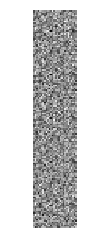

iter 500, loss0.008461416698992252


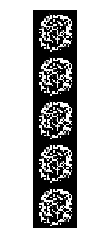

iter 1000, loss0.0006566924857906997


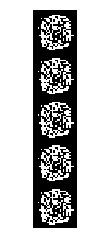

iter 1500, loss9.467512427363545e-06


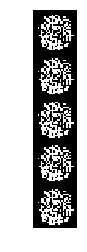

iter 2000, loss0.011336807161569595


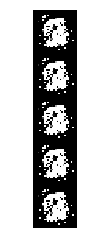

iter 2500, loss4.030433774460107e-05


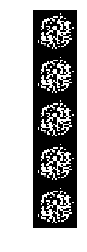

iter 3000, loss7.578233635285869e-06


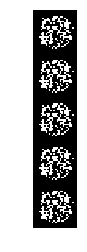

iter 3500, loss4.0257159525936e-06


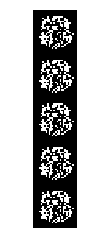

iter 4000, loss2.3192214939626865e-06


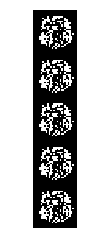

iter 4500, loss2.661501639522612e-06


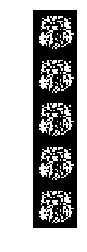

iter 5000, loss9.657832379161846e-06


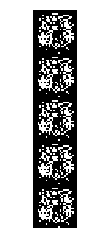

iter 5500, loss9.735306775837671e-06


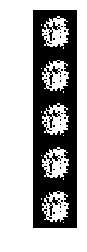

iter 6000, loss3.1125848636293085e-06


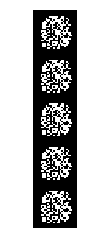

iter 6500, loss1.4591470289815334e-06


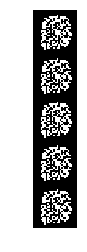

iter 7000, loss3.767015073208313e-07


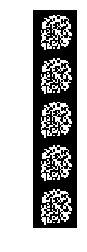

iter 7500, loss1.5616434723142447e-07


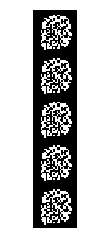

iter 8000, loss2.00271770722793e-07


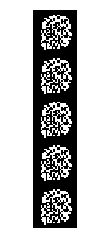

iter 8500, loss5.042594466431183e-07


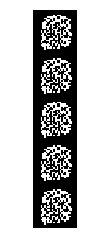

iter 9000, loss1.1039273886126466e-06


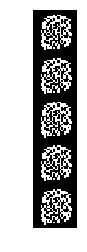

iter 9500, loss3.135205304261035e-07


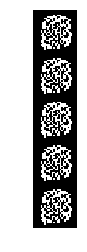

iter 10000, loss7.03334777085729e-08


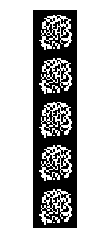

iter 10500, loss2.300748178640788e-07


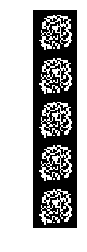

iter 11000, loss9.536747391791778e-09


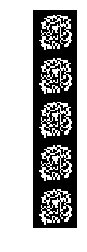

iter 11500, loss1.5497212402237892e-08


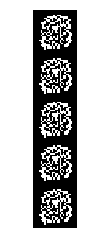

iter 12000, loss1.549721773130841e-08


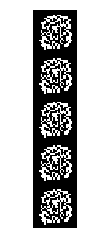

iter 12500, loss1.549721773130841e-08


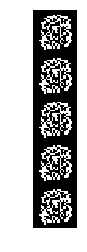

iter 13000, loss3.576283802431135e-08


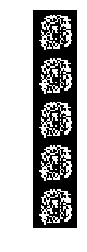

iter 13500, loss2.264977894128606e-08


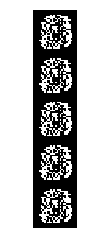

iter 14000, loss3.099441414633475e-08


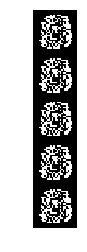

iter 14500, loss5.924789547862019e-07


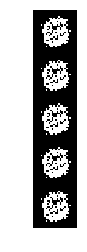

iter 15000, loss4.172325418494438e-08


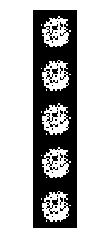

iter 15500, loss1.19209286886246e-09


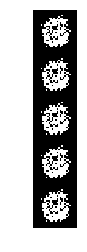

iter 16000, loss-0.0


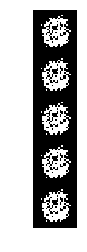

iter 16500, loss1.19209286886246e-09


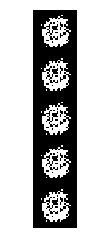

iter 17000, loss4.768372807717469e-09


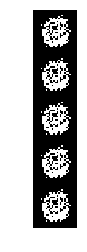

iter 17500, loss-0.0


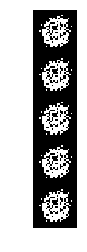

iter 18000, loss-0.0


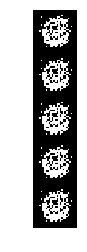

iter 18500, loss-0.0


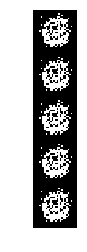

iter 19000, loss1.19209286886246e-09


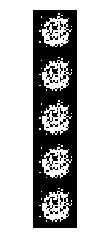

iter 19500, loss1.19209286886246e-09


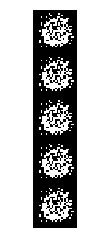

iter 20000, loss-0.0


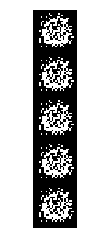

iter 20500, loss4.768372807717469e-09


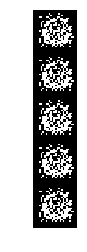

iter 21000, loss5.483630047820043e-07


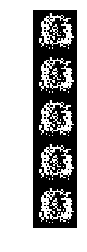

iter 21500, loss5.960464477539063e-08


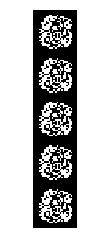

iter 22000, loss-0.0


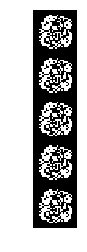

iter 22500, loss-0.0


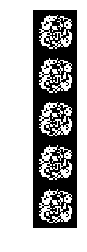

iter 23000, loss-0.0


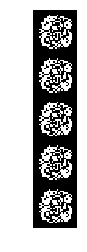

iter 23500, loss-0.0


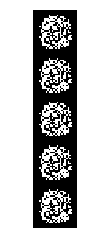

iter 24000, loss3.218650945768786e-08


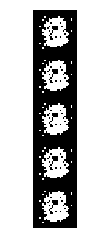

iter 24500, loss-0.0


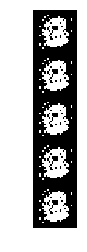

In [38]:
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

batch_size = 50

def next_feed_dict():
    return {
        z: np.random.uniform(0,1, [batch_size, z_dimension]),
        real_X: mnist.train.next_batch(batch_size)[0]
    }

# could let one train for 2 steps, the other for 1... way to adjust for the relative power of the two
for i in range(25000):
    sess.run(optimize_D, feed_dict = next_feed_dict())
    sess.run(optimize_G, feed_dict = next_feed_dict())

    if i % 500 == 0:
        fake_images, loss = sess.run([fake_X,D_loss],feed_dict=next_feed_dict())
        print("iter {0}, loss {1}".format(i,loss))
        visualize_row(fake_images[:5])


In [32]:
def generator(inp):
    h_G1 = tf.layers.dense(inp, 256, activation=tf.nn.relu)
    fake_X = tf.layers.dense(h_G1, 784, activation = tf.sigmoid)
    return fake_X


In [34]:
def discriminator(inp):
    h_D1= tf.layers.dense(inp, 256, name="D1", activation=tf.nn.relu)
    out = tf.layers.dense(h_D1, 1, name="D2", activation = tf.sigmoid)
    return out


In [35]:
# do this again using tf.layers: get rid of all of G's variables

z_dimension = 32 # number of random numbers we're giving to the generator

tf.reset_default_graph()

# placeholders
z = tf.placeholder(tf.float32,[None, z_dimension])
real_X = tf.placeholder(tf.float32, [None,784])


# Generator (dense = fully connected)
with tf.variable_scope("generator") as scope:
    fake_X = generator(z)
    
#with something as something_else: 
#    ...
#    ...
#same as something_else = something
#...
#...
#something_else.close()

# Discriminator 
with tf.variable_scope("discriminator") as scope:
    D_on_real = discriminator(real_X)
    # need to make sure we don't create new variables for real and fake images
    scope.reuse_variables()
    D_on_fake = discriminator(fake_X)

# Loss for D
# what is the reduce_mean function?
D_loss = -tf.reduce_mean(tf.concat([tf.log(D_on_real),tf.log(1. - D_on_fake)], axis=0))

# Loss for G
G_loss = -tf.reduce_mean(tf.log(D_on_fake))

# training operations (could use GD instead, this is just for example)
# by default it works along all tf.Variables to minimize D_loss or G_loss
#  but we want to hold D constant while we minimize G and vice versa
#  need to say which parameters we're minimizing with respect to via var_list
optimize_D = tf.train.AdamOptimizer().minimize(D_loss, var_list = variables_from_scope("discriminator"))
optimize_G = tf.train.AdamOptimizer().minimize(G_loss, var_list = variables_from_scope("generator"))

In [37]:
variables_from_scope("discriminator")

[<tf.Variable 'discriminator/D1/kernel:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'discriminator/D1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'discriminator/D2/kernel:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'discriminator/D2/bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'discriminator/D1/kernel/Adam:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'discriminator/D1/kernel/Adam_1:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'discriminator/D1/bias/Adam:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'discriminator/D1/bias/Adam_1:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'discriminator/D2/kernel/Adam:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'discriminator/D2/kernel/Adam_1:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'discriminator/D2/bias/Adam:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'discriminator/D2/bias/Adam_1:0' shape=(1,) dtype=float32_ref>]